# Universidade Federal da Paraíba

Disciplina: Introdução a ciência de dados.

Alunos:
    José de Arimateia Ferreira dos Santos Filho,
    Lucas Marques Bezerra,
    Raphael Leite da Costa Nascimento.


### Objetivo

Objetivo com este dataframe é o estudo de possíveis alimentos que um usuário pode inserir em sua dieta, para muitos uma dieta se consiste em simples perda de peso, mas dieta em si significa uma reeducação alimentar com um objetivo, portanto um dataframe neste sentido deve possuir uma boa gama de alimentos para que o usuário monte em base dos macros dos alimentos.

### Descrição do Dataset

Este Dataset possui uma grande variedade de alimentos, de alimentos convencionais com grande porte proteico, a alimentos não convencionais como bebidas alcoólicas, cada indivíduo possui um objetivo, para este usuário deve ser oferecido grande gama de dados.

In [139]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

diet_df = pd.read_csv("diet.csv", encoding = "UTF-8")

In [137]:
diet_df

,name,emoji,Calories (kcal),Carbohydrates (g),Total Sugar (g),Protein (g),Total Fat (g),Saturated Fat (g),Monounsaturated Fat (g),Polyunsaturated Fat (g),...,Calcium (g),Copper (mg),Iron (mg),Magnesium (mg),Manganese (mg),Phosphorus (g),Potassium (g),Selenium (ug),Sodium (g),Zinc (mg)
0,grapes,🍇,0.69,0.1810,0.1548,0.0072,0.0016,0.00054,0.00007,0.00048,...,0.10,0.00127,0.0036,0.07,0.00071,0.20,1.91,0.001,0.02,0.0007
1,melon,🍈,0.28,0.0658,0.0569,0.0111,0.0010,0.00025,0.00002,0.00039,...,0.11,0.00060,0.0034,0.11,0.00035,0.05,1.82,0.004,0.09,0.0007
2,watermelon,🍉,0.30,0.0755,0.0620,0.0061,0.0015,0.00016,0.00037,0.00050,...,0.07,0.00042,0.0024,0.10,0.00038,0.11,1.12,0.004,0.01,0.0010
3,tangerine,🍊,0.53,0.1334,0.1058,0.0081,0.0031,0.00039,0.00060,0.00065,...,0.37,0.00042,0.0015,0.12,0.00039,0.20,1.66,0.001,0.02,0.0007
4,lemon,🍋,0.29,0.0932,0.0250,0.0110,0.0030,0.00039,0.00011,0.00089,...,0.26,0.00037,0.0060,0.08,0.00030,0.16,1.38,0.004,0.02,0.0006
5,banana,🍌,0.89,0.2284,0.1223,0.0109,0.0033,0.00112,0.00032,0.00073,...,0.05,0.00078,0.0026,0.27,0.00270,0.22,3.58,0.010,0.01,0.0015
6,pineapple,🍍,0.50,0.1312,0.0985,0.0054,0.0012,0.00009,0.00013,0.00040,...,0.13,0.00110,0.0029,0.12,0.00927,0.08,1.09,0.001,0.01,0.0012
7,red apple,🍎,0.63,0.1522,0.1168,0.0020,0.0018,0.00000,0.00000,0.00000,...,0.07,0.00025,0.0010,0.05,0.00031,0.13,1.09,0.000,0.01,0.0004
8,green apple,🍏,0.58,0.1361,0.0959,0.0044,0.0019,0.00000,0.00000,0.00000,...,0.05,0.00031,0.0015,0.05,0.00044,0.12,1.20,0.001,0.01,0.0004
9,pear,🍐,0.57,0.1523,0.0975,0.0036,0.0014,0.00022,0.00084,0.00094,...,0.09,0.00082,0.0018,0.07,0.00048,0.12,1.16,0.001,0.01,0.0010


## Pré-Processamento

Para uma análise crua deste Dataset podemos ver que não há necessidade de alteração, mas estes emojis apesar de melhorar a visualização dos alimentos eles geram grandes problemas na hora de codificar a análise dos dados, portanto, para este projeto final iremos remover esta coluna.

In [140]:
# Tratamento do dataframe removendo a coluna emoji para facilitar a codificação das analises, pois não são tipos de dados usuais (str, int, float, bool).
diet_df = diet_df.drop(columns = ["emoji"])
diet_df.head(5)

,name,Calories (kcal),Carbohydrates (g),Total Sugar (g),Protein (g),Total Fat (g),Saturated Fat (g),Monounsaturated Fat (g),Polyunsaturated Fat (g),Total Fiber (g),...,Calcium (g),Copper (mg),Iron (mg),Magnesium (mg),Manganese (mg),Phosphorus (g),Potassium (g),Selenium (ug),Sodium (g),Zinc (mg)
0,grapes,0.69,0.1810,0.1548,0.0072,0.0016,0.00054,0.00007,0.00048,0.009,...,0.10,0.00127,0.0036,0.07,0.00071,0.20,1.91,0.001,0.02,0.0007
1,melon,0.28,0.0658,0.0569,0.0111,0.0010,0.00025,0.00002,0.00039,0.009,...,0.11,0.00060,0.0034,0.11,0.00035,0.05,1.82,0.004,0.09,0.0007
2,watermelon,0.30,0.0755,0.0620,0.0061,0.0015,0.00016,0.00037,0.00050,0.004,...,0.07,0.00042,0.0024,0.10,0.00038,0.11,1.12,0.004,0.01,0.0010
3,tangerine,0.53,0.1334,0.1058,0.0081,0.0031,0.00039,0.00060,0.00065,0.018,...,0.37,0.00042,0.0015,0.12,0.00039,0.20,1.66,0.001,0.02,0.0007
4,lemon,0.29,0.0932,0.0250,0.0110,0.0030,0.00039,0.00011,0.00089,0.028,...,0.26,0.00037,0.0060,0.08,0.00030,0.16,1.38,0.004,0.02,0.0006


## Perguntas analisadas

#### Pode-se utilizar frutas em uma estratégia que busque massa muscular?

In [134]:
# Recebendo apenas as colunas Calories (kcal) e Total Sugar (g)
diet_fruit = diet_df[["Calories (kcal)", "Total Sugar (g)"]]

Uma dieta de ganho de massa muscular é muito mais do que simplesmente carboidratos e proteínas, há a necessidade de fibras, vitaminas e minerais, mas para o caso das frutas a quantidade destes elementos chega a ser irrisório, então o que deve ser analisadas nelas? Simples, quantidade de calorias e de açúcar, frutas são alimentos que apesar de saborosas devem ser consumidas com cuidado, já que com o excesso delas pode subir muito a taxa de glicose pois as frutas são ricas em frutoses, o açúcar natural das frutas.


In [87]:
diet_fruit = diet_fruit[0:12]

In [88]:
diet_fruit.head(5)

,Calories (kcal),Total Sugar (g)
0,0.69,0.1548
1,0.28,0.0569
2,0.30,0.0620
3,0.53,0.1058
4,0.29,0.0250


In [89]:
# Criação do 3 kmeans para realização de agrupamentos e comparando assim a proporção de cada alimento
kmeans = KMeans(n_clusters = 3)
kmeans.fit(diet_fruit)
kmeans.labels_

array([1, 0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 1])

<AxesSubplot:xlabel='Calories (kcal)', ylabel='Total Sugar (g)'>

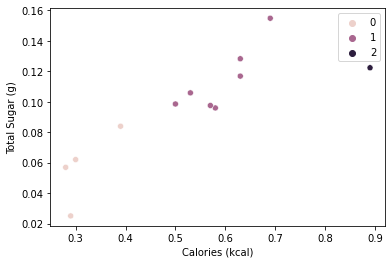

In [94]:
# Plotando o gráfico de agrupamento
sns.scatterplot(data=diet_fruit, x="Calories (kcal)", y="Total Sugar (g)", hue=kmeans.labels_)

In [132]:
# Recebendo novamente o dataframe sem alterações nos elementos frutas.
diet_fruit = diet_df[0:12]

In [133]:
# Ordem crescente de açúcar nos elementos da coluna.
diet_fruit.sort_values(by = "Total Sugar (g)")

,name,Calories (kcal),Carbohydrates (g),Total Sugar (g),Protein (g),Total Fat (g),Saturated Fat (g),Monounsaturated Fat (g),Polyunsaturated Fat (g),Total Fiber (g),...,Calcium (g),Copper (mg),Iron (mg),Magnesium (mg),Manganese (mg),Phosphorus (g),Potassium (g),Selenium (ug),Sodium (g),Zinc (mg)
4,lemon,0.29,0.0932,0.0250,0.0110,0.0030,0.00039,0.00011,0.00089,0.028,...,0.26,0.00037,0.0060,0.08,0.00030,0.16,1.38,0.004,0.02,0.0006
1,melon,0.28,0.0658,0.0569,0.0111,0.0010,0.00025,0.00002,0.00039,0.009,...,0.11,0.00060,0.0034,0.11,0.00035,0.05,1.82,0.004,0.09,0.0007
2,watermelon,0.30,0.0755,0.0620,0.0061,0.0015,0.00016,0.00037,0.00050,0.004,...,0.07,0.00042,0.0024,0.10,0.00038,0.11,1.12,0.004,0.01,0.0010
10,peach,0.39,0.0954,0.0839,0.0091,0.0025,0.00019,0.00067,0.00086,0.015,...,0.06,0.00068,0.0025,0.09,0.00061,0.20,1.90,0.001,0.00,0.0017
8,green apple,0.58,0.1361,0.0959,0.0044,0.0019,0.00000,0.00000,0.00000,0.028,...,0.05,0.00031,0.0015,0.05,0.00044,0.12,1.20,0.001,0.01,0.0004
9,pear,0.57,0.1523,0.0975,0.0036,0.0014,0.00022,0.00084,0.00094,0.031,...,0.09,0.00082,0.0018,0.07,0.00048,0.12,1.16,0.001,0.01,0.0010
6,pineapple,0.50,0.1312,0.0985,0.0054,0.0012,0.00009,0.00013,0.00040,0.014,...,0.13,0.00110,0.0029,0.12,0.00927,0.08,1.09,0.001,0.01,0.0012
3,tangerine,0.53,0.1334,0.1058,0.0081,0.0031,0.00039,0.00060,0.00065,0.018,...,0.37,0.00042,0.0015,0.12,0.00039,0.20,1.66,0.001,0.02,0.0007
7,red apple,0.63,0.1522,0.1168,0.0020,0.0018,0.00000,0.00000,0.00000,0.021,...,0.07,0.00025,0.0010,0.05,0.00031,0.13,1.09,0.000,0.01,0.0004
5,banana,0.89,0.2284,0.1223,0.0109,0.0033,0.00112,0.00032,0.00073,0.026,...,0.05,0.00078,0.0026,0.27,0.00270,0.22,3.58,0.010,0.01,0.0015


Com esta análise podemos observar que as 3 melhores frutas que não interferem tanto na dieta são limão, melão e melancia respectivamente, mas observando que limão é uma fruta que necessariamente é melhor para sucos ela não é tão recomendada já que é necessário uma grande quantidade de açúcar para adoçar, então a melhor fruta que não interfere tanto é o melão.


#### Para uma pessoa diabética existem alimentos que tenham carboidratos mas não contenham açúcar?

Como pode ser analisado, há diversos alimentos neste DataFrame que não possuem açúcar, porém, muitos destes alimentos não necessariamente são saudáveis pelo quesito de possuírem muita gordura ou muito carboidrato, o que necessariamente apesar de fugir de um problema, ira ocasionalmente partir para outro.


In [130]:
# Criação de outro dataframe para realizar tratamento de troca de nome de coluna, pois .loc não encontraria a coluna (Total Sugar (g)) devido aos espaços.
diet_sugar = diet_df[:]
diet_sugar = diet_sugar.rename(columns = {"Total Sugar (g)": "Sugar"})
diet_sugar.loc[diet_sugar.Sugar == 0]

,name,Calories (kcal),Carbohydrates (g),Sugar,Protein (g),Total Fat (g),Saturated Fat (g),Monounsaturated Fat (g),Polyunsaturated Fat (g),Total Fiber (g),...,Calcium (g),Copper (mg),Iron (mg),Magnesium (mg),Manganese (mg),Phosphorus (g),Potassium (g),Selenium (ug),Sodium (g),Zinc (mg)
24,chestnut,1.96,0.4417,0.0,0.0163,0.0125,0.00235,0.00430,0.00493,0.000,...,0.19,0.00418,0.0094,0.30,0.00336,0.38,4.84,0.000,0.02,0.0049
28,pancakes,2.27,0.2830,0.0,0.0640,0.0970,0.02122,0.02474,0.04447,0.000,...,2.19,0.00049,0.0180,0.16,0.00200,1.59,1.32,0.149,4.39,0.0056
29,cheese,3.93,0.0144,0.0,0.2696,0.3099,0.18227,0.08046,0.01341,0.000,...,8.90,0.00047,0.0013,0.33,0.00026,5.74,0.72,0.300,1.87,0.0437
30,beef,2.17,0.0000,0.0,0.2748,0.1105,0.04600,0.05159,0.00583,0.000,...,0.19,0.00079,0.0357,0.20,0.00004,2.10,2.80,0.304,0.68,0.0469
31,chicken,1.84,0.0000,0.0,0.2403,0.0899,0.02446,0.03564,0.01855,0.000,...,0.12,0.00061,0.0109,0.23,0.00020,2.02,2.64,0.257,0.98,0.0207
32,bacon,8.98,0.0000,0.0,0.0007,0.9950,0.31991,0.41435,0.10535,0.000,...,0.01,0.00022,0.0013,0.00,0.00006,0.09,0.15,0.057,0.27,0.0006
33,hamburger,2.54,0.2481,0.0,0.1174,0.1225,0.03755,0.04809,0.02343,0.000,...,0.57,0.00093,0.0239,0.20,0.00230,1.13,2.06,0.187,4.58,0.0187
36,hotdog,2.47,0.1840,0.0,0.1060,0.1484,0.05213,0.06993,0.01741,0.000,...,0.24,0.00078,0.0236,0.13,0.00093,0.99,1.46,0.265,6.84,0.0202
39,popcorn,5.00,0.5720,0.0,0.0900,0.2810,0.04890,0.08170,0.13420,0.100,...,0.10,0.00221,0.0278,1.08,0.00879,2.50,2.25,0.073,8.84,0.0264
40,rice crackers,4.16,0.8264,0.0,0.1000,0.0500,0.00000,0.03021,0.01641,0.000,...,0.00,0.00301,0.0000,1.56,0.04071,3.62,2.43,0.255,2.33,0.0220
